--2024-04-04 04:32:37--  https://github.com/opencv/opencv/raw/master/samples/dnn/face_detector/deploy.prototxt
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt [following]
--2024-04-04 04:32:38--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28104 (27K) [text/plain]
Saving to: ‘deploy.prototxt.2’

deploy.prototxt.2   100%[===================>]  27.45K  --.-KB/s    in 0.002s  

2024-04-04 04:32:38 (16.3 MB/s) - ‘deploy.prototxt.2’ saved 

Saving download (1).jpeg to download (1) (5).jpeg


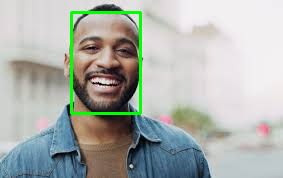

In [7]:
import cv2
from google.colab import files
from google.colab.patches import cv2_imshow
import numpy as np

!wget https://github.com/opencv/opencv/raw/master/samples/dnn/face_detector/deploy.prototxt
!wget https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

def detect_faces_and_display(image):
    try:
        prototxt_path = "deploy.prototxt"
        model_path = "res10_300x300_ssd_iter_140000.caffemodel"
        net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

        resized_image = cv2.resize(image, (300, 300))

        blob = cv2.dnn.blobFromImage(resized_image, 1.0, (300, 300), [104, 117, 123], False, False)

        net.setInput(blob)

        detections = net.forward()

        for i in range(detections.shape[2]):
            confidence = detections[0, 0, i, 2]
            if confidence > 0.5:
                box = detections[0, 0, i, 3:7] * np.array([image.shape[1], image.shape[0], image.shape[1], image.shape[0]])
                (startX, startY, endX, endY) = box.astype(int)
                cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)

        cv2_imshow(image)

        cv2.waitKey(0)
        cv2.destroyAllWindows()

    except Exception as e:
        print("Error:", e)

def main():
    try:
        uploaded = files.upload()

        if len(uploaded) == 0:
            raise ValueError("No file uploaded")

        file_name = list(uploaded.keys())[0]

        image = cv2.imread(file_name)

        if image is None:
            raise ValueError("Error loading image")

        detect_faces_and_display(image)

    except ValueError as ve:
        print("ValueError:", ve)
    except Exception as e:
        print("Error:", e)

if __name__ == "__main__":
    main()
